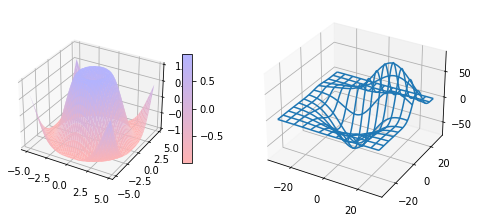

In [47]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib import colors
from mpl_toolkits.mplot3d.axes3d import get_test_data


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d') #1行2列，第一个图，设为3D图

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cmap, #cm.coolwarm, #rstride代表步幅
                       linewidth=0, antialiased=True)
ax.set_zlim(-1.01, 1.01)  #设置Z轴标签
fig.colorbar(surf, shrink=0.5, aspect=10)

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

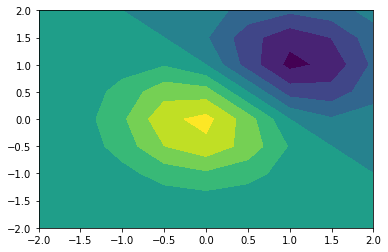

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

extent = (-3, 3, -3, 3)

delta = 0.5
x = np.arange(-3.0, 4.001, delta)
y = np.arange(-4.0, 3.001, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = Z1 - Z2

norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())

fig, ax = plt.subplots()
cset1 = ax.contourf(
    X, Y, Z, 10,   #10代表轮廓线的数量
    norm=norm)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
#ax.set_xticks([1,2,3])
#ax.set_yticks([4,5,6])
#fig.savefig("contour_frontpage.png", dpi=25)  # results in 160x120 px image
plt.show()

In [48]:
np.power(4,0.5)

2.0

In [51]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0,0.5], [1, 1,2], [2, 2,0]], [0, 1,1])

reg.coef_


array([0.28571429, 0.28571429, 0.28571429])

In [53]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

reg.coef_

array([0.5, 0.5])

In [54]:
from python_utils import converters

ModuleNotFoundError: No module named 'python_utils'

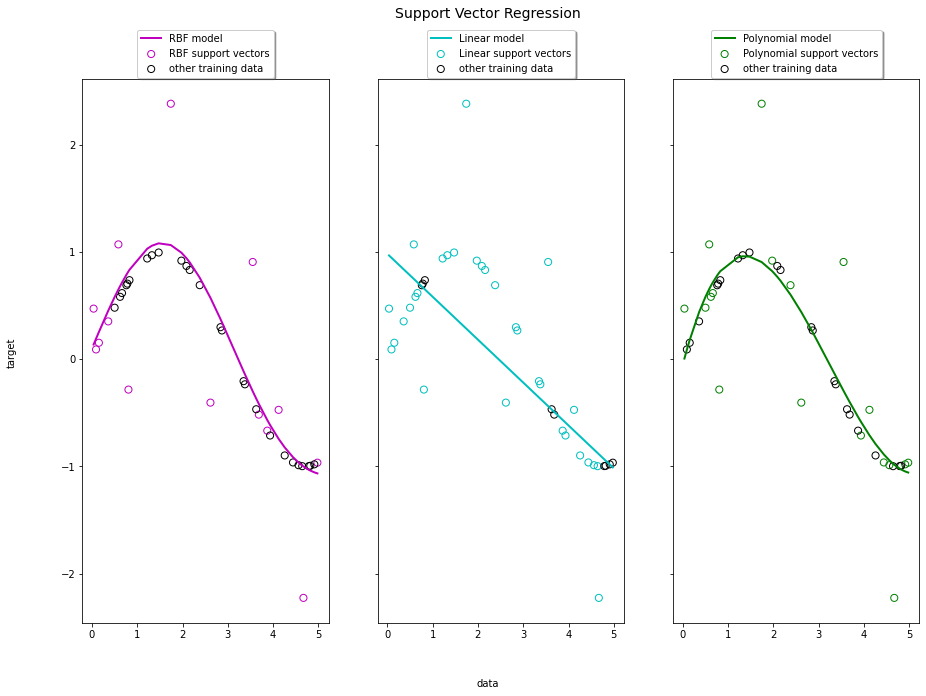

In [55]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),  # legend 图例,0.5对应水平居中，1.1设置顶部显示，数值越大，离主图越远
                    ncol=1, fancybox=True, shadow=True) #col列数量

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical') #rotation旋转,vertical 垂直
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [56]:
from sklearn.linear_model import LinearRegression
import numpy as np
x=np.array([[1,1],[1,2],[2,2],[2,3]])
y=np.dot(x,np.array([[1,2],[2,3]]))+3
reg=LinearRegression(positive=True).fit(x,y)
print(reg)
print(reg.coef_)
reg.predict(np.array([[3,5]]))

LinearRegression(positive=True)
[[1. 2.]
 [2. 3.]]


array([[16., 24.]])

In [57]:
reg.coe_f

LinearRegression(positive=True)